In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
products = pd.read_csv('Downloads/mo_c/customers.csv')
orders= pd.read_csv('Downloads/mo_c/orders.csv')
customers = pd.read_csv('Downloads/mo_c/products.csv')

In [4]:
df01 = pd.merge(products,orders)
d_f = pd.merge(df01,customers)

In [5]:
d_f['Revenue'] = d_f['Unit Price'] * d_f['Quantity']

In [6]:
df = d_f[['Order Date','Revenue']]

In [7]:
df.columns=['Date', 'Revenue']

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=False) # True : to set date as index
df.head()

,Date,Revenue
0,2019-09-05,19.90
1,2019-09-05,41.25
2,2021-06-17,12.95
3,2021-07-15,27.50
4,2021-07-15,54.97


In [9]:
# sorting date vslues
df = df.sort_values(by='Date',ascending=True)

In [10]:
# Re-sampling the data : reducing frequency
df = df.resample('M', on='Date').sum()

In [11]:
df.head()

,Revenue
Date,
2019-01-31,828.985
2019-02-28,987.405
2019-03-31,1021.140
2019-04-30,1680.750
2019-05-31,398.565


In [12]:
df.tail()

,Revenue
Date,
2022-04-30,776.450
2022-05-31,1002.370
2022-06-30,1155.390
2022-07-31,906.730
2022-08-31,244.245


In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

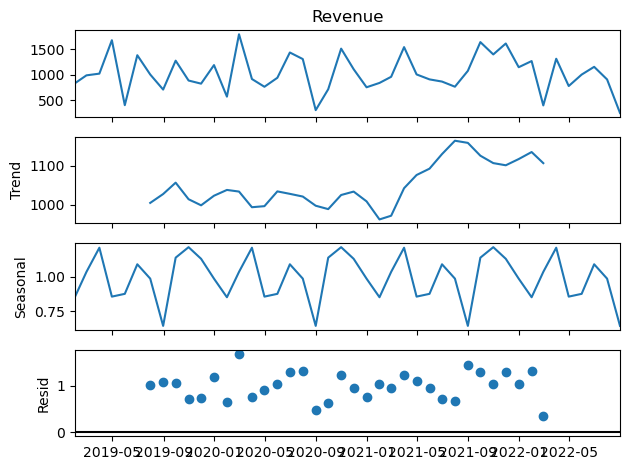

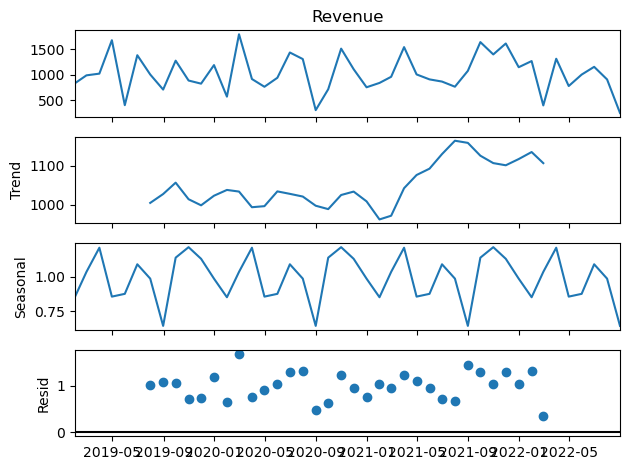

In [14]:
result_a = seasonal_decompose(df['Revenue'], model='multiplicative')
result_a.plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

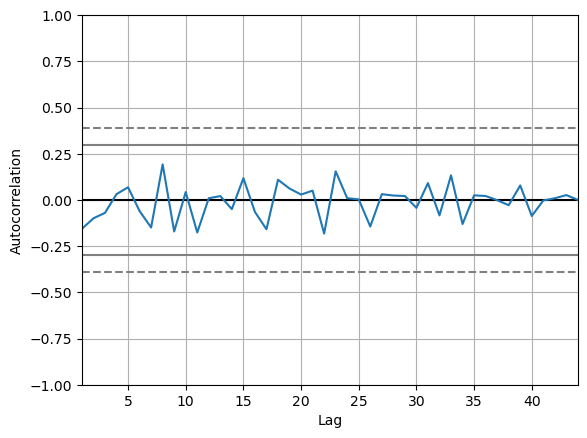

In [15]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Revenue'])

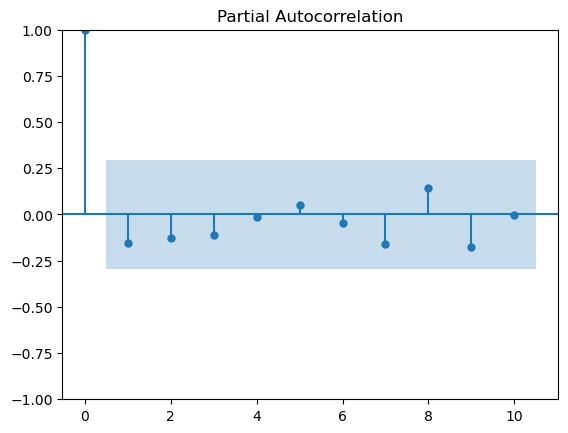

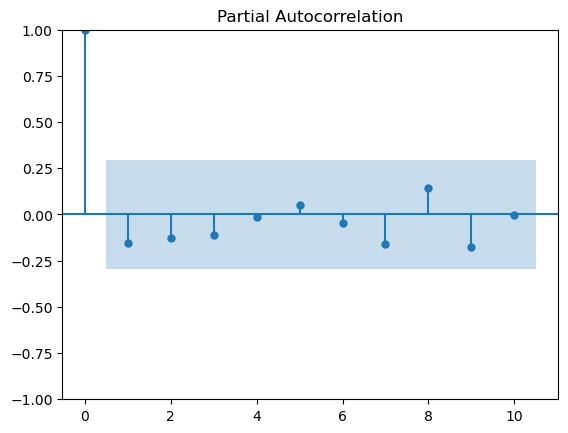

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Revenue'], lags=10)

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [18]:
model = SARIMAX(df['Revenue'], order=(1,1,1), seasonal_order=(1,1,1,12))

In [19]:
model_fit = model.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                   44
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -234.645
Date:                            Tue, 23 Sep 2025   AIC                            479.290
Time:                                    20:14:42   BIC                            486.460
Sample:                                01-31-2019   HQIC                           481.627
                                     - 08-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1807      0.320     -0.564      0.572      -0.808       0.447
ma.L1         -0.9984     12.595     -0.079      0.937     -25.684      23.688
ar.S.L12      -0.0810      0.416     -0.195      0.845      -0.895       0.733
ma.S.L12      -0.9843     12.982     -0.076      0.940     -26.428      24.460
sigma2      1.267e+05   7.72e-05   1.64e+09      0.000    1.27e+05    1.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.00
Prob(Q):                              0.74   Prob(JB):                         0.61
Heteroskedasticity (H):               1.21   Skew:                            -0.26
Prob(H) (two-sided):                  0.77   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.91e+26. Standard errors may be unstable.
"""

In [21]:
residuals = model_fit.resid

In [22]:
output = model_fit.forecast()

In [23]:
output

2022-09-30    1242.700494
Freq: ME, dtype: float64

In [24]:
model_fit.forecast(12)

2022-09-30    1242.700494
2022-10-31    1258.325686
2022-11-30    1161.745564
2022-12-31    1000.792387
2023-01-31     864.445344
2023-02-28    1120.406338
2023-03-31    1201.912870
2023-04-30    1093.092973
2023-05-31     833.475007
2023-06-30    1219.648797
2023-07-31    1019.086202
2023-08-31     659.315660
Freq: ME, Name: predicted_mean, dtype: float64

In [25]:
yhat = model_fit.predict()

In [26]:
yhat.head()

Date
2019-01-31       0.000000
2019-02-28     707.306274
2019-03-31     942.996490
2019-04-30    1010.544077
2019-05-31    1522.954845
Freq: ME, Name: predicted_mean, dtype: float64

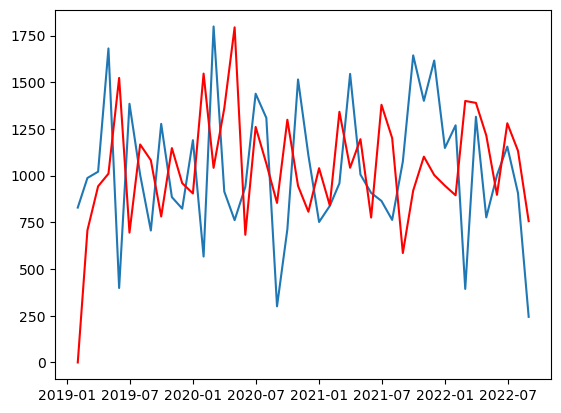

In [27]:
plt.plot(df['Revenue'])
plt.plot(yhat, color='red')